### Stochastic Soaring Raptor Simulator (SSRS)
https://github.com/NREL/SSRS
- Easy to use tool for predicting conflict between likely golden eagle routes and operational/planned wind turbines
- Simulates a large number of golden eagle tracks from a given location/region under given wind conditions
- Applicable to any region in the continental US (Only uses publicly available data)
- Captures uncertainty in atmospheric conditions, eagle decision-making, and starting/entry location

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import matplotlib.pyplot as plt
from dataclasses import replace, asdict
from ssrs import Terrain, Simulator, Config, WTK

### Extracting terrain data from USGS's 3DEP dataset
https://www.usgs.gov/3d-elevation-program

In [6]:
# snapshot mode in Wyoming on 17 June 2010 at 1 pm
config_wy_uniform = Config(
    # terrain parameters
    run_name='run_wy',
    southwest_lonlat=(42.78, -106.21), 
    region_width_km=(60., 50.),
    resolution=100.,
    # simulation parameters
    sim_mode='uniform',
    uniform_winddirn=270.,
    uniform_windspeed=10.,
    track_direction=0.,
    track_count = 500,
    track_start_region=(20, 21, 0, 0)
)
#print(config_wy_snapshot)
sim = Simulator(**asdict(config_wy_uniform))

---- SSRS in uniform mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
TurbinesUSWTB: Minimum hub height set to 50.0 m
Computing orographic updrafts..


Number of projects: 9
Number of turbines: 416
Hub height (min,median,max): 80.0, 80.0, 89.0
Rotor Dia (min,median,max): 77.0, 91.0, 127.0
    Project                   State Year  Count Hub_Hght  Rotor_Dia 
1.  Cedar Springs II          WY    2020  3     89.0      127.0     
2.  Cedar Springs III         WY    2020  46    89.0      127.0     
3.  Cedar Springs I           WY    2020  24    89.0      127.0     
4.  Top of the World          WY    2010  110   80.0      77.0      
5.  Glenrock                  WY    2008  66    80.0      91.0      
6.  Rolling Hills             WY    2009  66    80.0      91.0      
7.  Glenrock III              WY    2009  26    80.0      91.0      
8.  Campbell Hill             WY    2009  66    80.0      77.0      
9.  Casper Wind Farm          WY    2009  9     80.0      77.0      


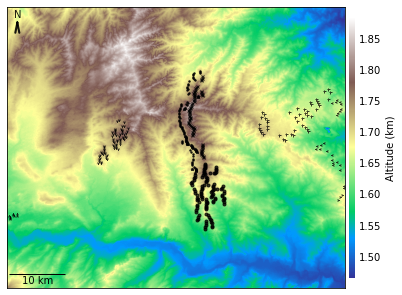

In [7]:
sim.plot_terrain_elevation(show=True)
sim.turbines.print_details()

# Uniform mode

###  Westerly wind, eagle entering from southern boundary

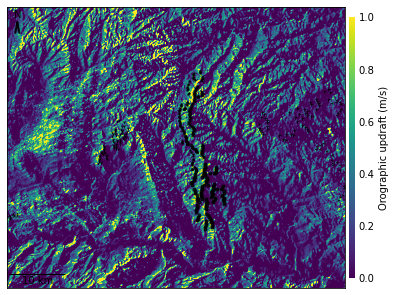

In [8]:
sim.plot_orographic_updrafts(show=True)

s10d270_north: Found saved potential
s10d270_north: Simulating 500 tracks..took 13 sec
Plotting simulated_tracks..
Plotting presence maps..


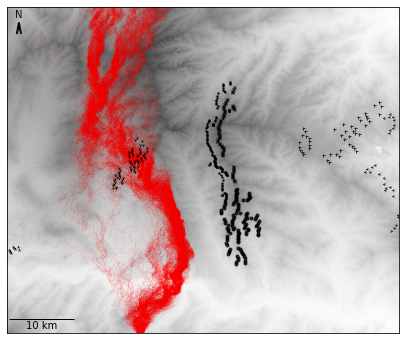

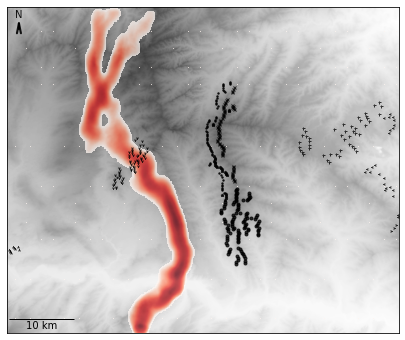

In [9]:
sim.simulate_tracks()
sim.plot_simulated_tracks(show=True)
sim.plot_presence_maps(show=True)

---- SSRS in uniform mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
TurbinesUSWTB: Minimum hub height set to 50.0 m
Computing orographic updrafts..
s10d270_north: Found saved potential
s10d270_north: Simulating 500 tracks..took 13 sec
Plotting presence maps..


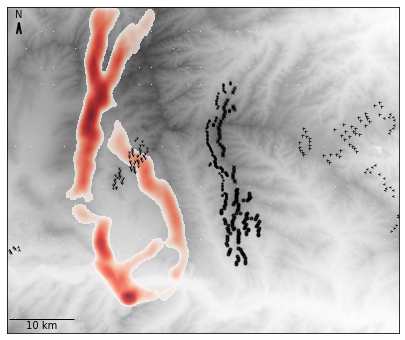

In [10]:
config_wy_uniform = replace(
    config_wy_uniform,
    track_start_region=(18, 19, 5, 5)
)
sim = Simulator(**asdict(config_wy_uniform))
sim.simulate_tracks()
#sim.plot_simulated_tracks(show=True)
sim.plot_presence_maps(show=True)

---- SSRS in uniform mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
TurbinesUSWTB: Minimum hub height set to 50.0 m
Computing orographic updrafts..
s10d270_north: Found saved potential
s10d270_north: Simulating 500 tracks..took 11 sec
Plotting presence maps..


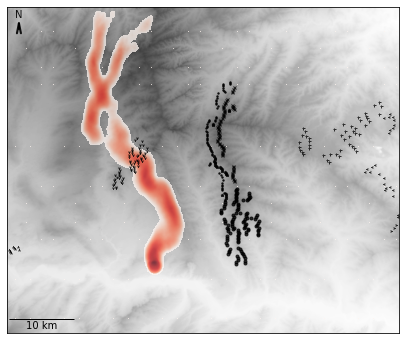

In [11]:
config_wy_uniform = replace(
    config_wy_uniform,
    track_start_region=(22, 23, 10, 10)
)
sim = Simulator(**asdict(config_wy_uniform))
sim.simulate_tracks()
#sim.plot_simulated_tracks(show=True)
sim.plot_presence_maps(show=True)

### When we don't know the plausible entry points 

---- SSRS in uniform mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
TurbinesUSWTB: Minimum hub height set to 50.0 m
Computing orographic updrafts..
s10d270_north: Found saved potential
s10d270_north: Simulating 500 tracks..took 14 sec
Plotting simulated_tracks..
Plotting presence maps..


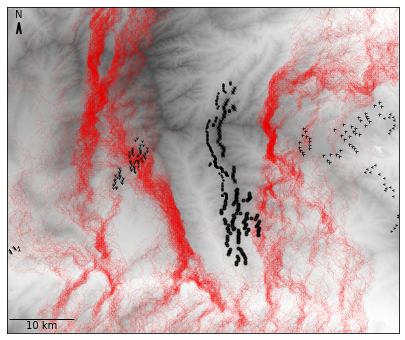

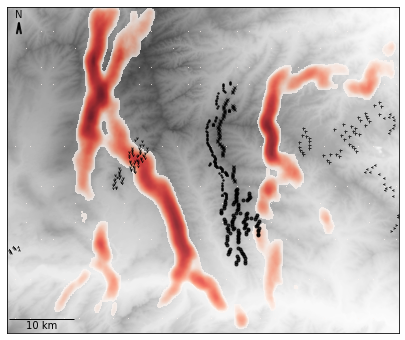

In [12]:
config_wy_uniform = replace(
    config_wy_uniform,
    track_start_region=(5, 55, 0, 0)
)
sim = Simulator(**asdict(config_wy_uniform))
sim.simulate_tracks()
sim.plot_simulated_tracks(show=True)
sim.plot_presence_maps(show=True)

# Snapshot mode

### Focusing on a specific time and then importing spatially varying wind conditions from NREL's WindToolKit data set

In [13]:
config_wy_snapshot = replace(
    config_wy_uniform,
    sim_mode='snapshot',
    snapshot_datetime=(2014, 12, 1, 15),
    track_start_region=(55, 58, 0, 0),
    track_direction='northwest',
)
sim = Simulator(**asdict(config_wy_snapshot))

---- SSRS in snapshot mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
TurbinesUSWTB: Minimum hub height set to 50.0 m
Considering WindToolKit source: AWS
WTK: Downloading following layers:
winddirection_100m
temperature_100m
windspeed_100m
pressure_100m
Computing orographic updrafts..took 23 sec


In [ ]:
sim.plot_wtk_layers(show=True)

In [ ]:
sim.simulate_tracks()
sim.plot_simulated_tracks(show=True)
sim.plot_presence_maps(show=True)

# Seasonal mode
- Focuses on seasonal behavior by considering range of wind conditions experienced in that season
- provides a summarized presence map for the season.

# Limitations of SSRS
- Need 3D presence to compute risk
- Does not take into account other factors such as type of activity, prey distribution, thermal updrafts